On May 14, 2021, Ireland’s Health Service Executive (HSE) faced a devastating ransomware attack. Critical IT systems were shut down across hospitals, appointment systems failed, and patient care was severely disrupted. The attackers deployed the Conti ransomware, demanding millions in ransom and threatening to leak stolen patient data.

In this notebook, we simulate this real-world incident using synthetic forensic logs and demonstrate how Large Language Models (LLMs) can:

- Rapidly summarize complex forensic logs

- Reconstruct attack timelines

- Identify Indicators of Compromise (IoCs)

- Visualize the attack kill chain using knowledge graphs

LLMs act as a digital forensic assistant, transforming scattered forensic artifacts into actionable insights within minutes.

### References
- [Wikipedia: HSE Ransomware Attack](https://en.wikipedia.org/wiki/Health_Service_Executive_ransomware_attack)
- [Conti Playbook Leak](https://www.advintel.io/post/the-conti-playbook-leaked)
- [HSE Timeline - Irish Times](https://www.irishtimes.com/news/health/hse-cyberattack-timeline)

Step 1: Load files and Import required Libraries

In [ ]:

!pip install openai graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forensic_log_hse_synthetic.json to forensic_log_hse_synthetic.json


In [ ]:
# ✅ Cell 3: Upload your OpenAI API key file (named `openai_api_key.txt`)
from google.colab import files
uploaded = files.upload()

Saving openai_api_key.txt to openai_api_key.txt


Step 2: Load Forensic Log

In [ ]:
# ✅ Cell 4: Set up OpenAI environment
import os
import openai

with open("openai_api_key.txt") as f:
    os.environ["OPENAI_API_KEY"] = f.read().strip()
    openai.api_key = os.environ["OPENAI_API_KEY"]

In [ ]:
# ✅ Cell 5: Load and inspect the forensic log
import json

with open("forensic_log_hse_synthetic.json") as f:
    forensic_log = json.load(f)

print("[Summary of Events]")
for event in forensic_log["events"]:
    print(f"- {event['timestamp']}: {event['description']}")

[Summary of Events]
- 2021-05-14T02:30:00Z: User opened a macro-enabled Excel file attached in a phishing email.
- 2021-05-14T02:35:00Z: Excel macro launched PowerShell script to fetch Cobalt Strike beacon.
- 2021-05-14T02:50:00Z: Cobalt Strike beacon initiated lateral movement and credential harvesting.
- 2021-05-14T03:10:00Z: Conti ransomware payload (conti.exe) dropped on domain controller.
- 2021-05-14T03:20:00Z: Hospital file servers encrypted by ransomware.
- 2021-05-14T03:25:00Z: Ransom note (readme.txt) created on infected systems.
- 2021-05-14T03:30:00Z: Exfiltration of sensitive patient data confirmed by outgoing traffic to suspicious IP.


In [ ]:
from openai import OpenAI

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a cybersecurity forensic analyst assistant."},
        {"role": "user", "content": f"Given this forensic log: {json.dumps(forensic_log['events'], indent=2)}\\nSummarize the attack in timeline form."}
    ]
)

print(response.choices[0].message.content)


Sure, here is a timeline summarizing the attack based on the forensic log provided:

- 2021-05-14T02:30:00Z: User opened a macro-enabled Excel file attached in a phishing email.
- 2021-05-14T02:35:00Z: Excel macro launched PowerShell script to fetch Cobalt Strike beacon.
- 2021-05-14T02:50:00Z: Cobalt Strike beacon initiated lateral movement and credential harvesting.
- 2021-05-14T03:10:00Z: Conti ransomware payload (conti.exe) dropped on domain controller.
- 2021-05-14T03:20:00Z: Hospital file servers encrypted by ransomware.
- 2021-05-14T03:25:00Z: Ransom note (readme.txt) created on infected systems.
- 2021-05-14T03:30:00Z: Exfiltration of sensitive patient data confirmed by outgoing traffic to suspicious IP.

This timeline shows the progression of the attack from the initial phishing email to the execution of ransomware and exfiltration of sensitive data.


Step 3: Visualize the Graph

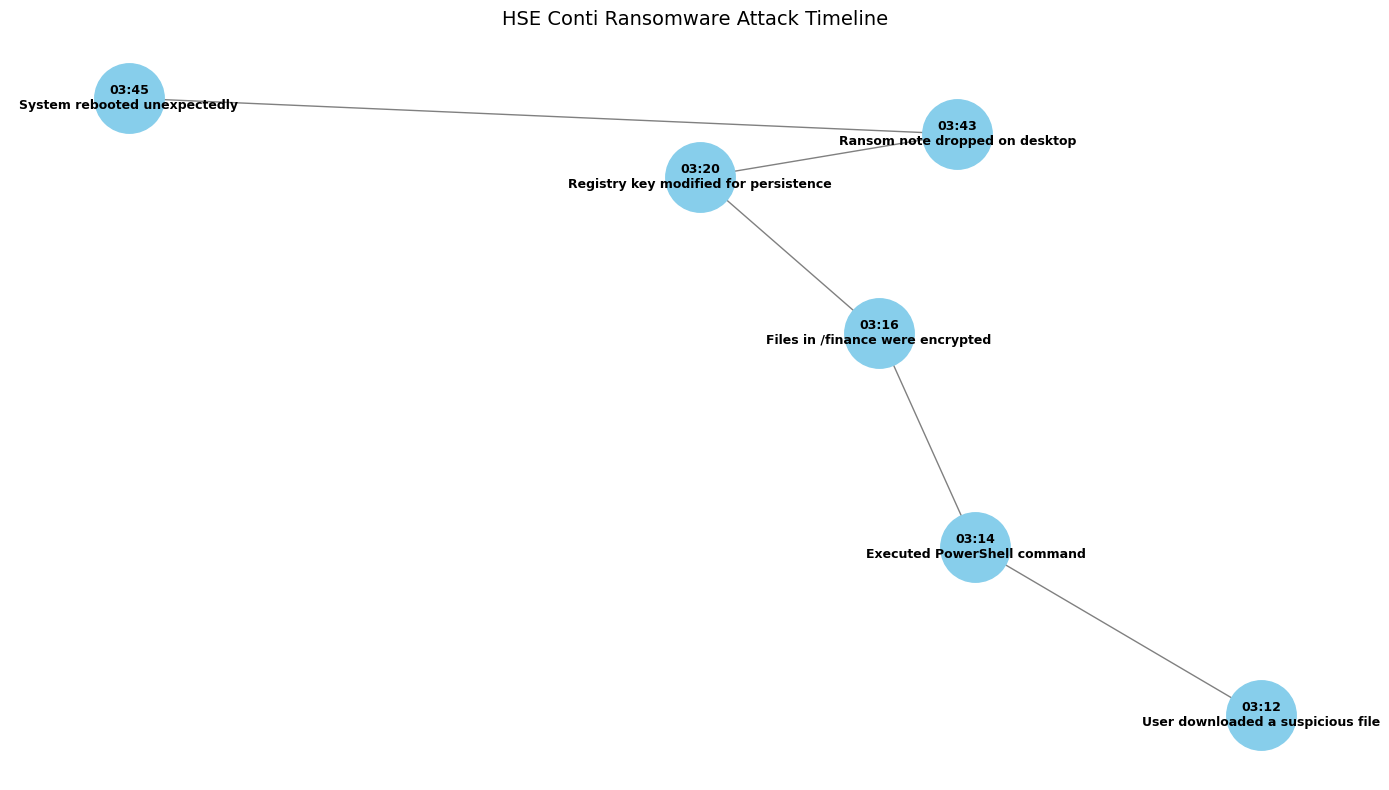

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Sample event data for visualization
sample_events = [
    {"timestamp": "03:12", "description": "User downloaded a suspicious file"},
    {"timestamp": "03:14", "description": "Executed PowerShell command"},
    {"timestamp": "03:16", "description": "Files in /finance were encrypted"},
    {"timestamp": "03:20", "description": "Registry key modified for persistence"},
    {"timestamp": "03:43", "description": "Ransom note dropped on desktop"},
    {"timestamp": "03:45", "description": "System rebooted unexpectedly"}
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes with labels
for idx, event in enumerate(sample_events):
    label = f"{event['timestamp']}\n{event['description']}"
    G.add_node(idx, label=label)

# Add timeline edges
edges = [(i, i+1) for i in range(len(sample_events)-1)]
G.add_edges_from(edges)

# Graph layout and styling
pos = nx.spring_layout(G, seed=42)
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(14, 8))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2500)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_weight='bold')

plt.title("HSE Conti Ransomware Attack Timeline", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()
